# <span style="color:#BB99FF"> *Easy Analysis of Company's Ideal Customers* </span>

<img src="supermarkett.jpg">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

_Dataset_

People:

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products:

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion:

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place:

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## <span style="color:#45F0F3"> Analysis of data </span>

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col=0)
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [5]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
(df.isnull().sum()/len(df))

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [8]:
df['Income']=df['Income'].fillna(df['Income'].mode()[0])

In [9]:
(df.isnull().sum()/len(df))

Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [10]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
import warnings
warnings.filterwarnings("ignore", message="The default value of numeric_only in DataFrame.corr is deprecated")

<AxesSubplot: >

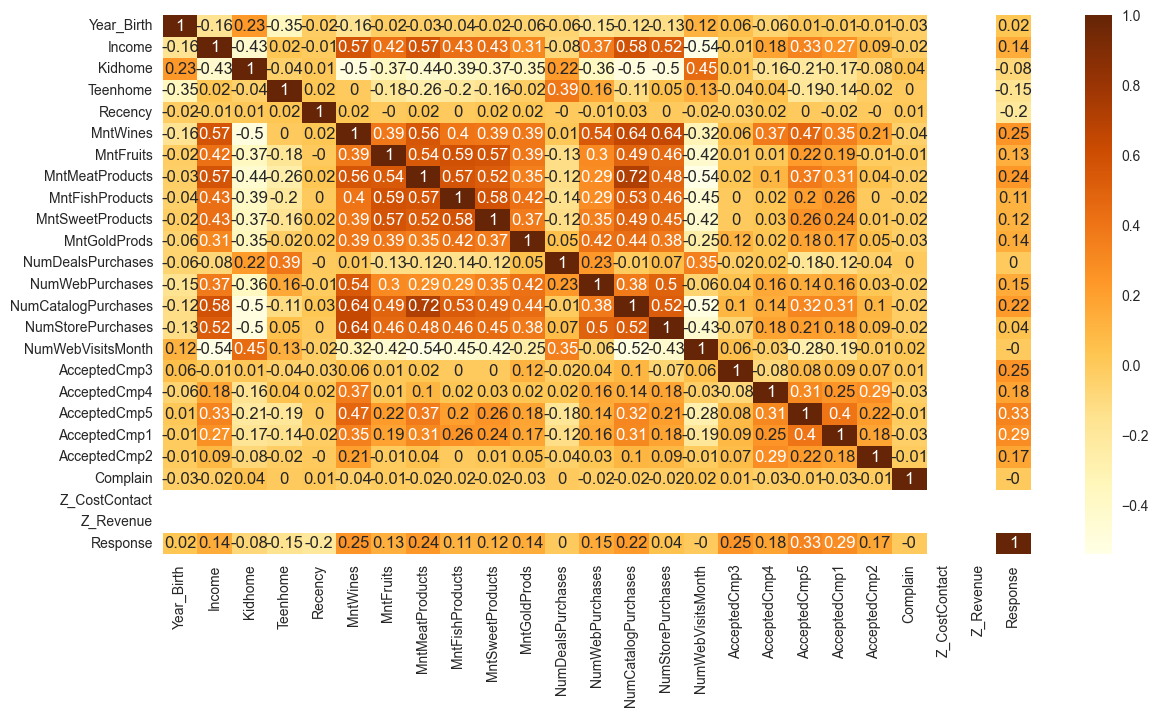

In [12]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [13]:
df = df.drop(['MntWines', 'MntMeatProducts'], axis = 1)

<AxesSubplot: >

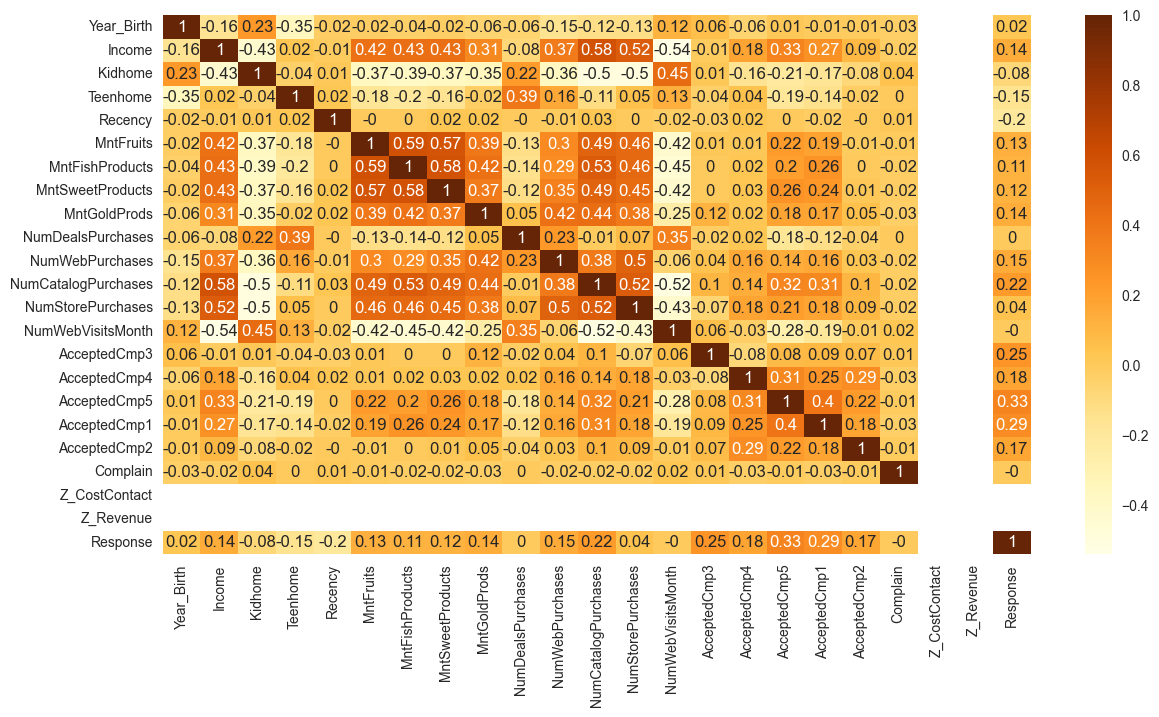

In [14]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

People category analysis 

<AxesSubplot: title={'center': 'Variable Complain'}, xlabel='Complain', ylabel='count'>

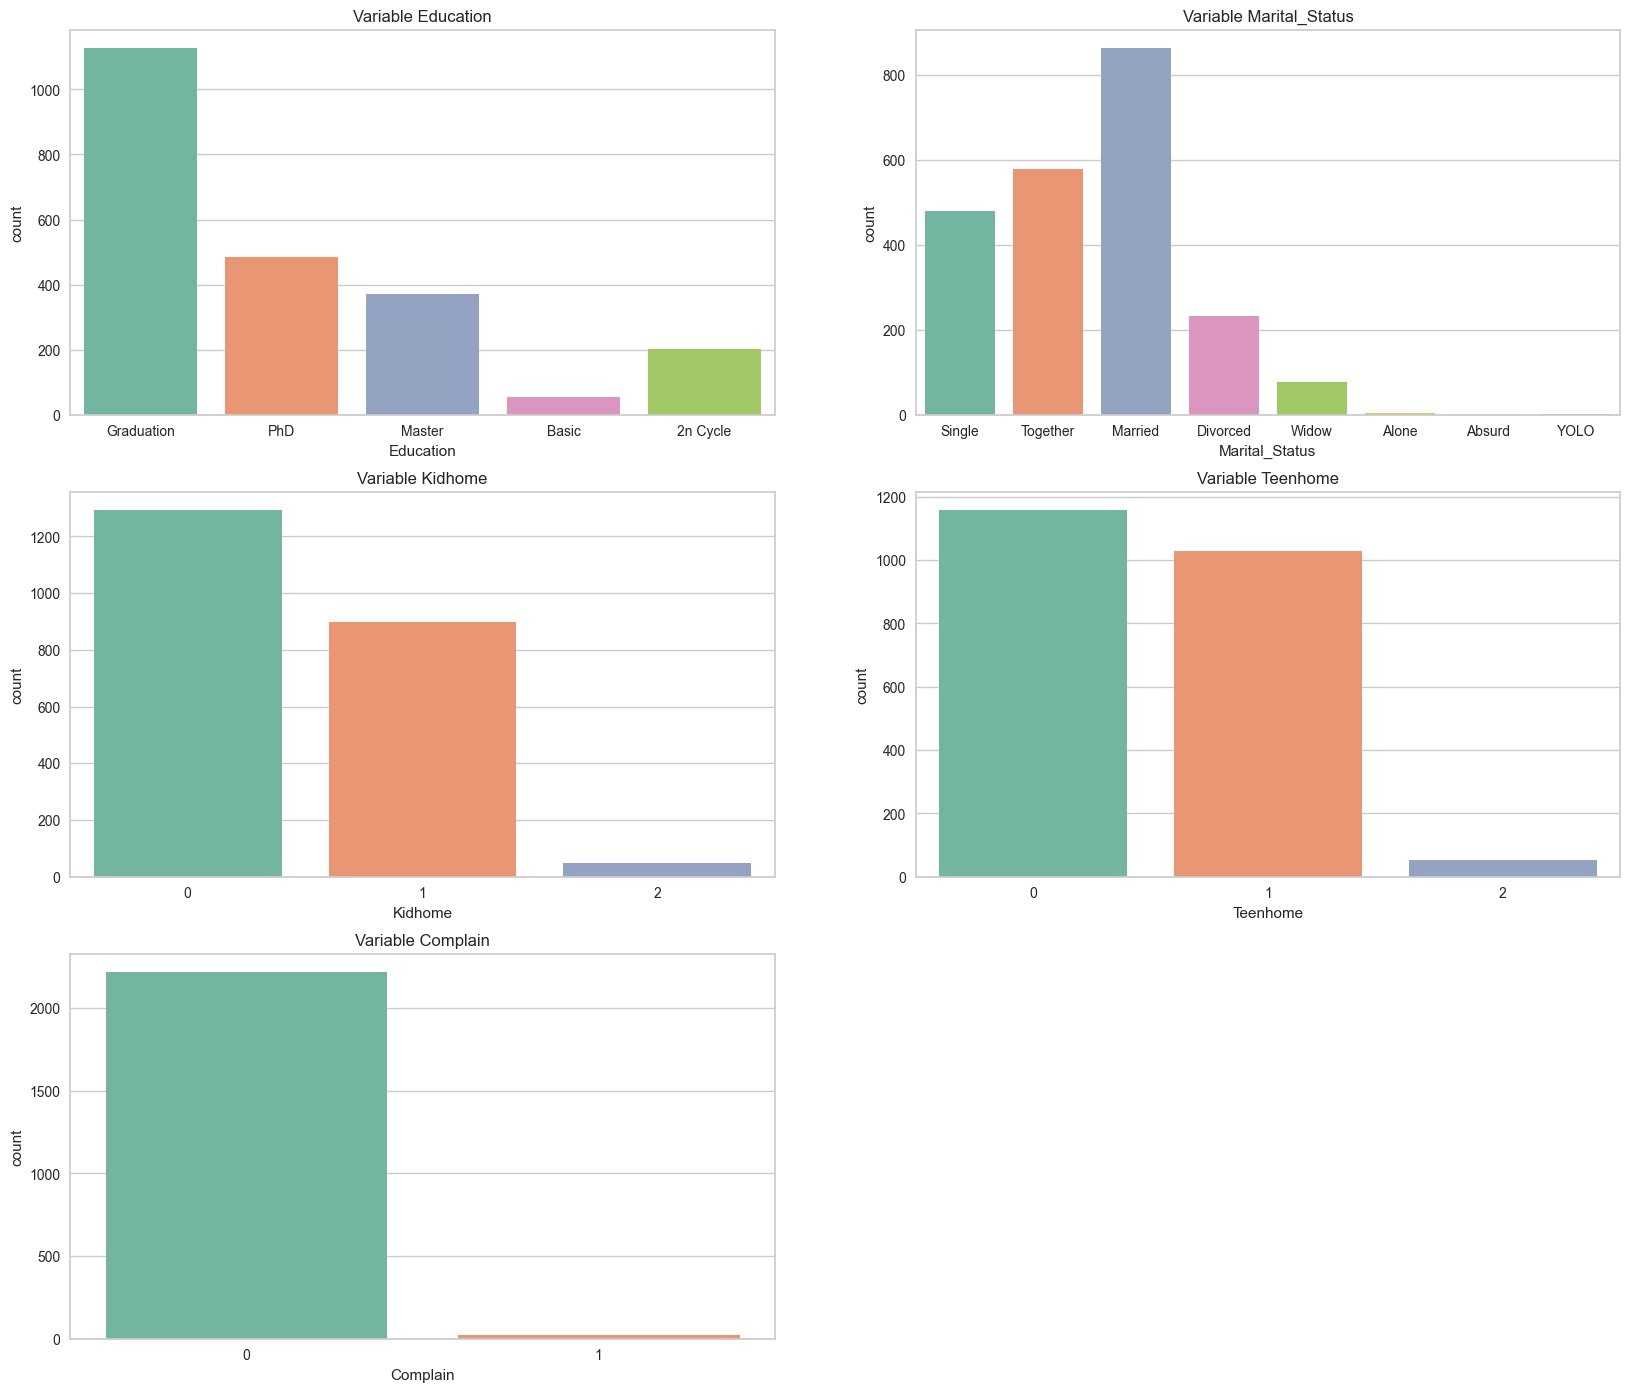

In [16]:
plt.figure(figsize = (20,35))

plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(6,2,2)
plt.gca().set_title('Variable Marital_Status')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)

plt.subplot(6,2,3)
plt.gca().set_title('Variable Kidhome')
sns.countplot(x = 'Kidhome', palette = 'Set2', data = df)

plt.subplot(6,2,4)
plt.gca().set_title('Variable Teenhome')
sns.countplot(x = 'Teenhome', palette = 'Set2', data = df)

plt.subplot(6,2,5)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Income', ylabel='Count'>

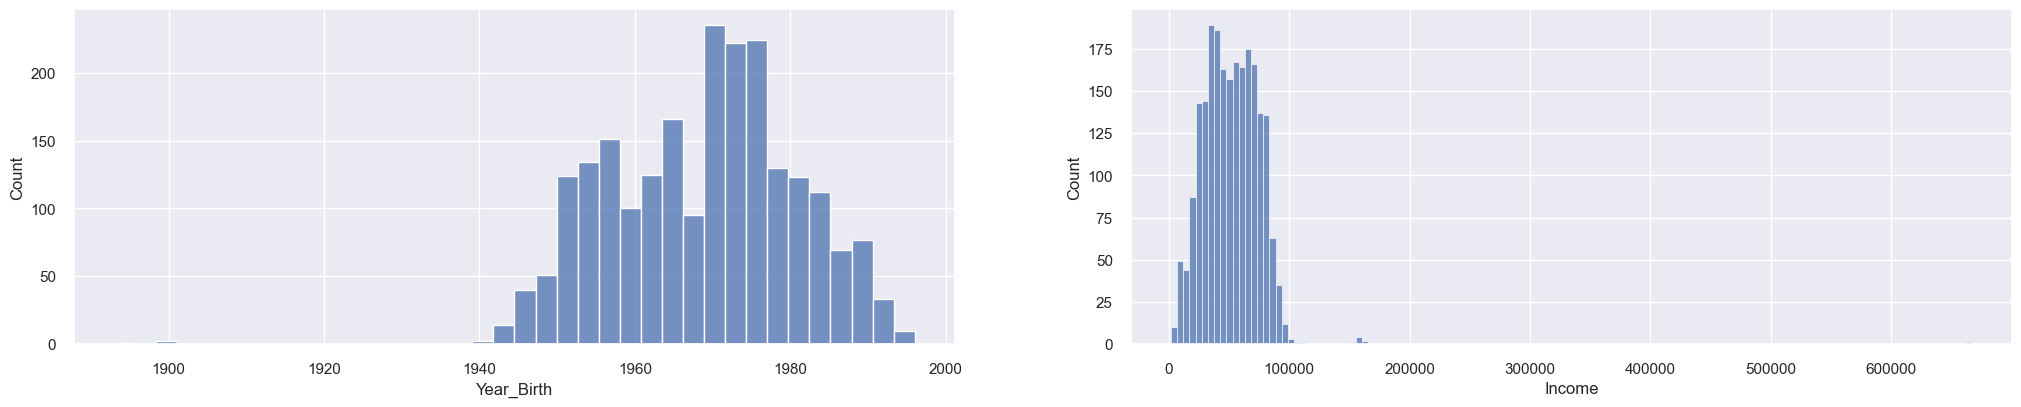

In [17]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.histplot(df['Year_Birth'], kde = False)

plt.subplot(4,2,2)
sns.histplot(df['Income'], kde = False)


<AxesSubplot: title={'center': 'Boxplot Year_Birth'}, xlabel='Year_Birth'>

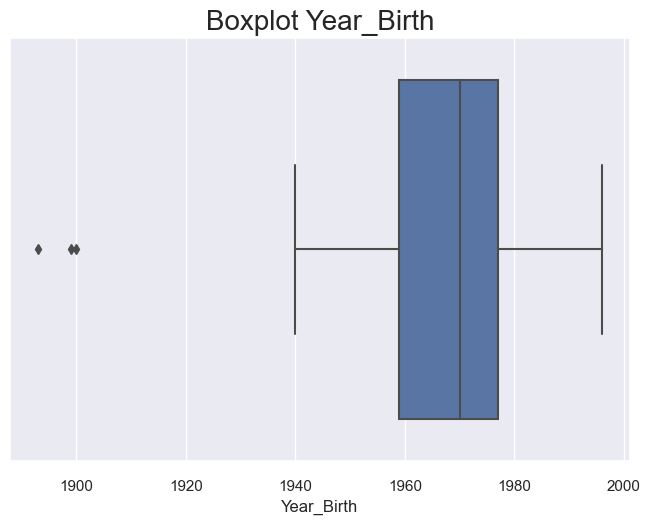

In [18]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

In [19]:
df[df['Year_Birth'] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,6,7,...,5,0,0,0,0,0,1,3,11,0
11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,0,7,...,4,0,0,0,0,0,0,3,11,0
1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,144,104,...,1,0,0,1,0,0,0,3,11,0


In [20]:
df = df[df['Year_Birth'] > 1920]
# Eliminamos los datos de las personas que cumplieron antes de 1920

<AxesSubplot: title={'center': 'Boxplot Year_Birth'}, xlabel='Year_Birth'>

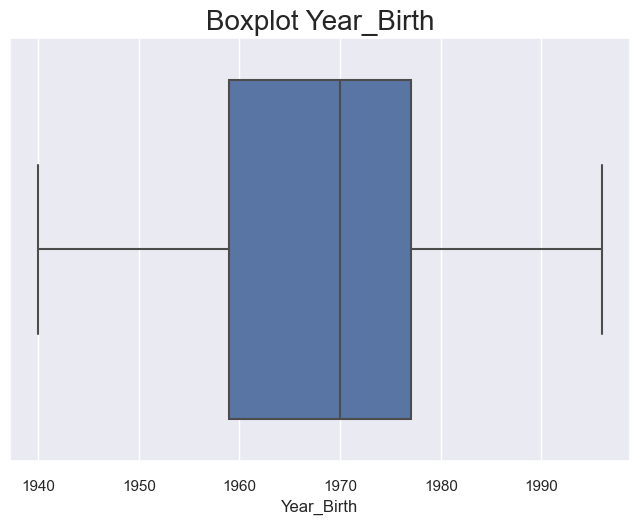

In [21]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

<AxesSubplot: title={'center': 'Boxplot Recency'}, xlabel='Recency'>

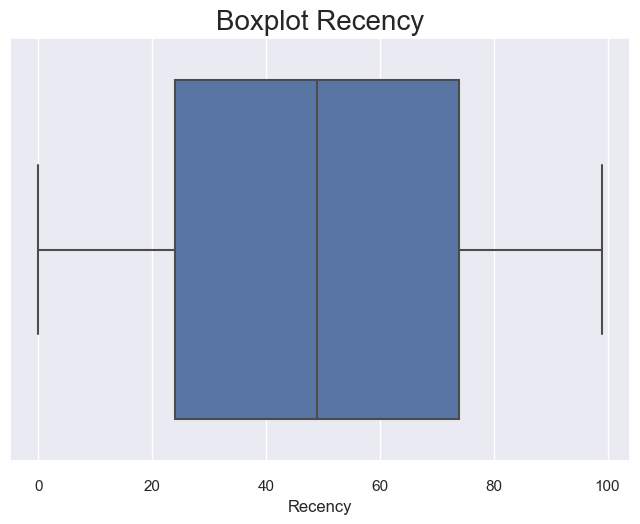

In [22]:
plt.title("Boxplot Recency", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Recency"])

Products category analysis 

<AxesSubplot: xlabel='MntGoldProds', ylabel='Count'>

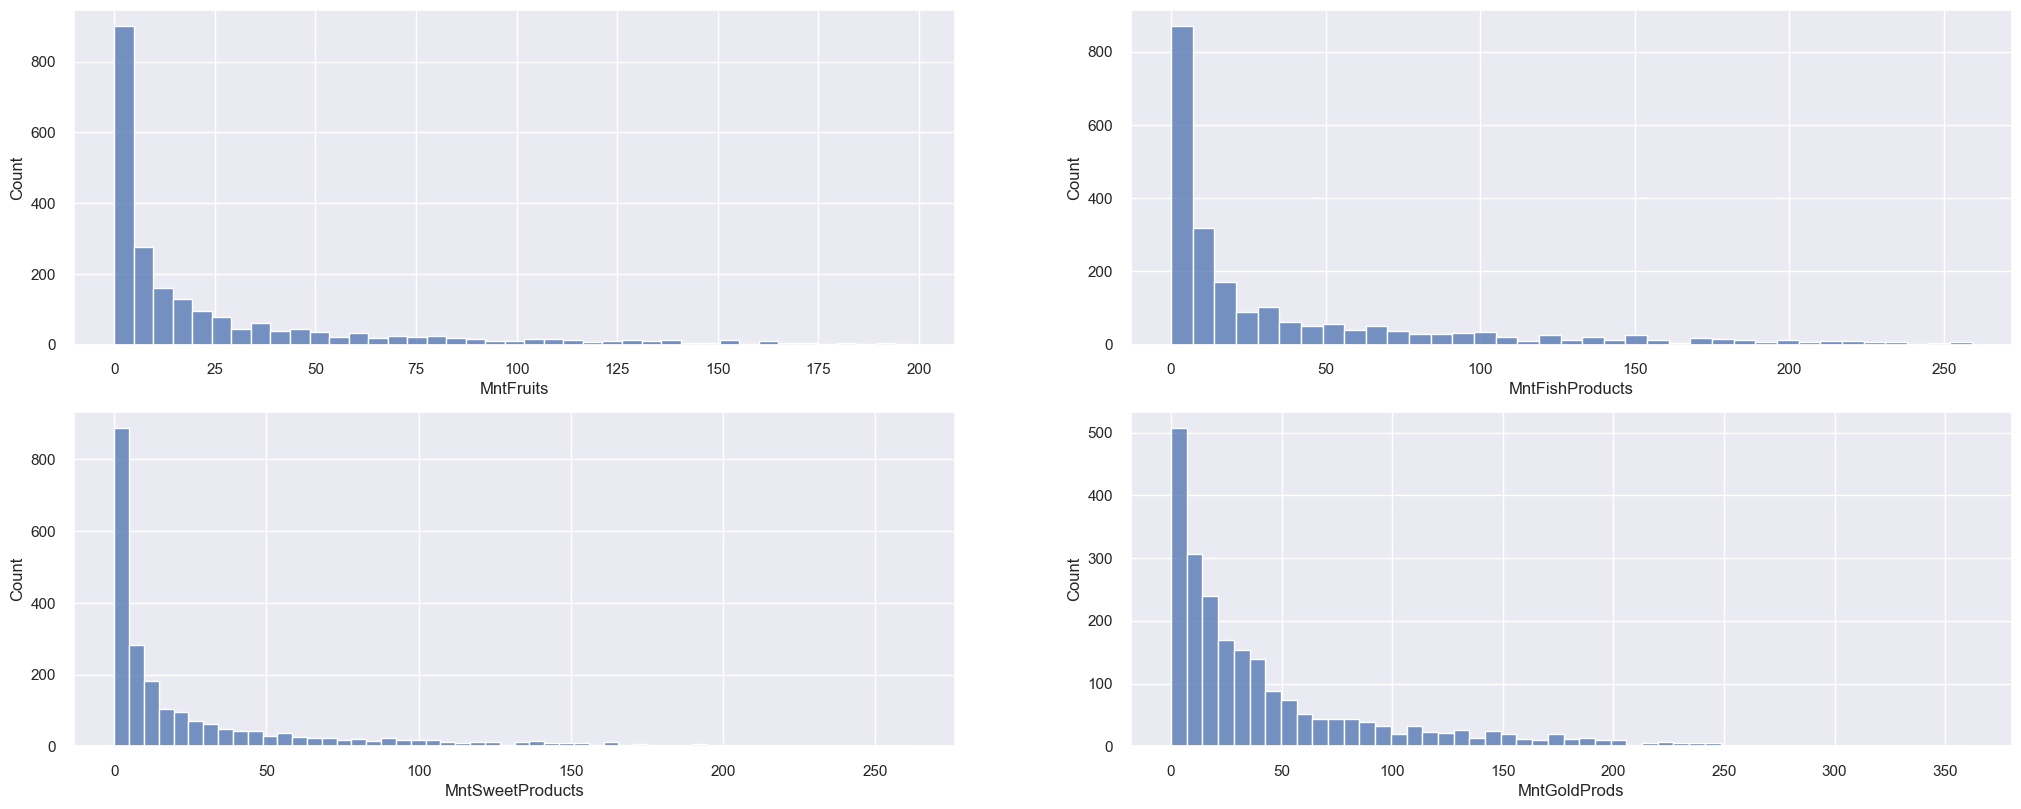

In [23]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)
plt.subplot(4,2,1)
sns.histplot(df['MntFruits'], kde = False)

plt.subplot(4,2,2)
sns.histplot(df['MntFishProducts'], kde = False)

plt.subplot(4,2,3)
sns.histplot(df['MntSweetProducts'], kde = False)

plt.subplot(4,2,4)
sns.histplot(df['MntGoldProds'], kde = False)

<AxesSubplot: title={'center': 'Boxplot MntFruits'}, xlabel='MntFruits'>

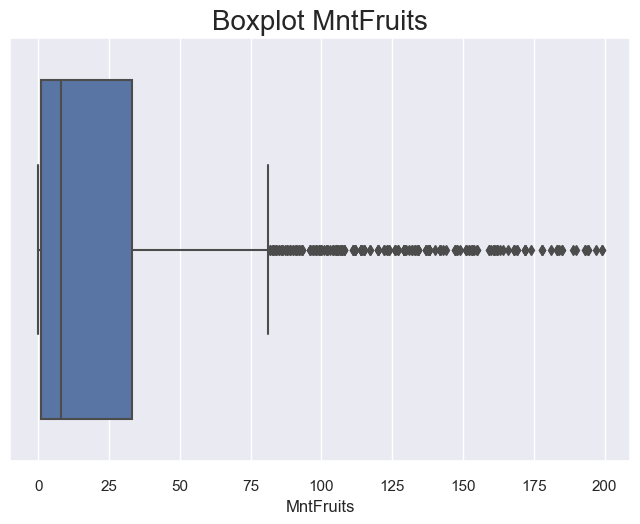

In [24]:
plt.title("Boxplot MntFruits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFruits"])

<AxesSubplot: title={'center': 'Boxplot MntFishProducts'}, xlabel='MntFishProducts'>

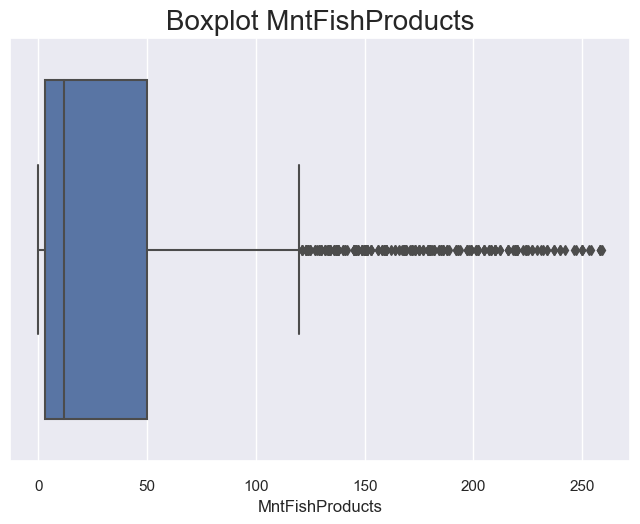

In [25]:
plt.title("Boxplot MntFishProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFishProducts"])

<AxesSubplot: title={'center': 'Boxplot MntSweetProducts'}, xlabel='MntSweetProducts'>

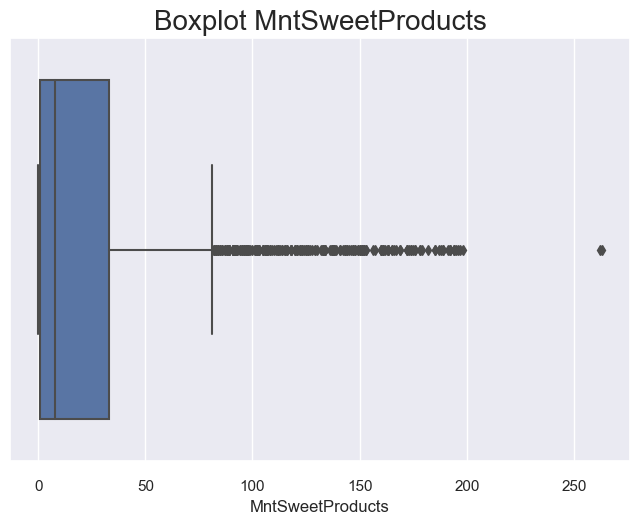

In [26]:
plt.title("Boxplot MntSweetProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntSweetProducts"])

<AxesSubplot: title={'center': 'Boxplot MntGoldProds'}, xlabel='MntGoldProds'>

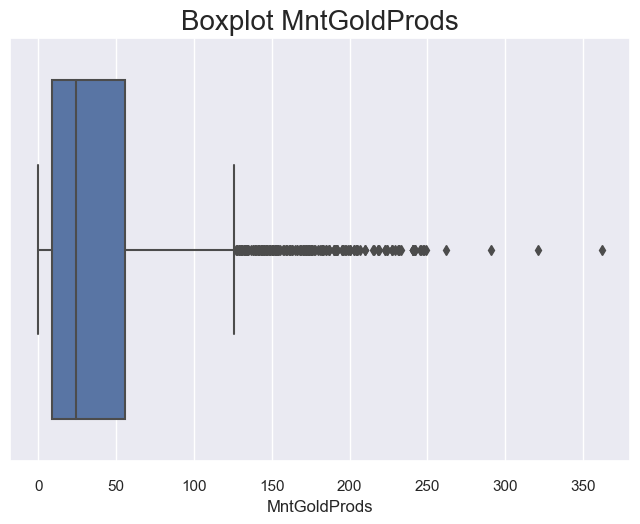

In [27]:
plt.title("Boxplot MntGoldProds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntGoldProds"])

Place

<AxesSubplot: xlabel='NumWebVisitsMonth', ylabel='count'>

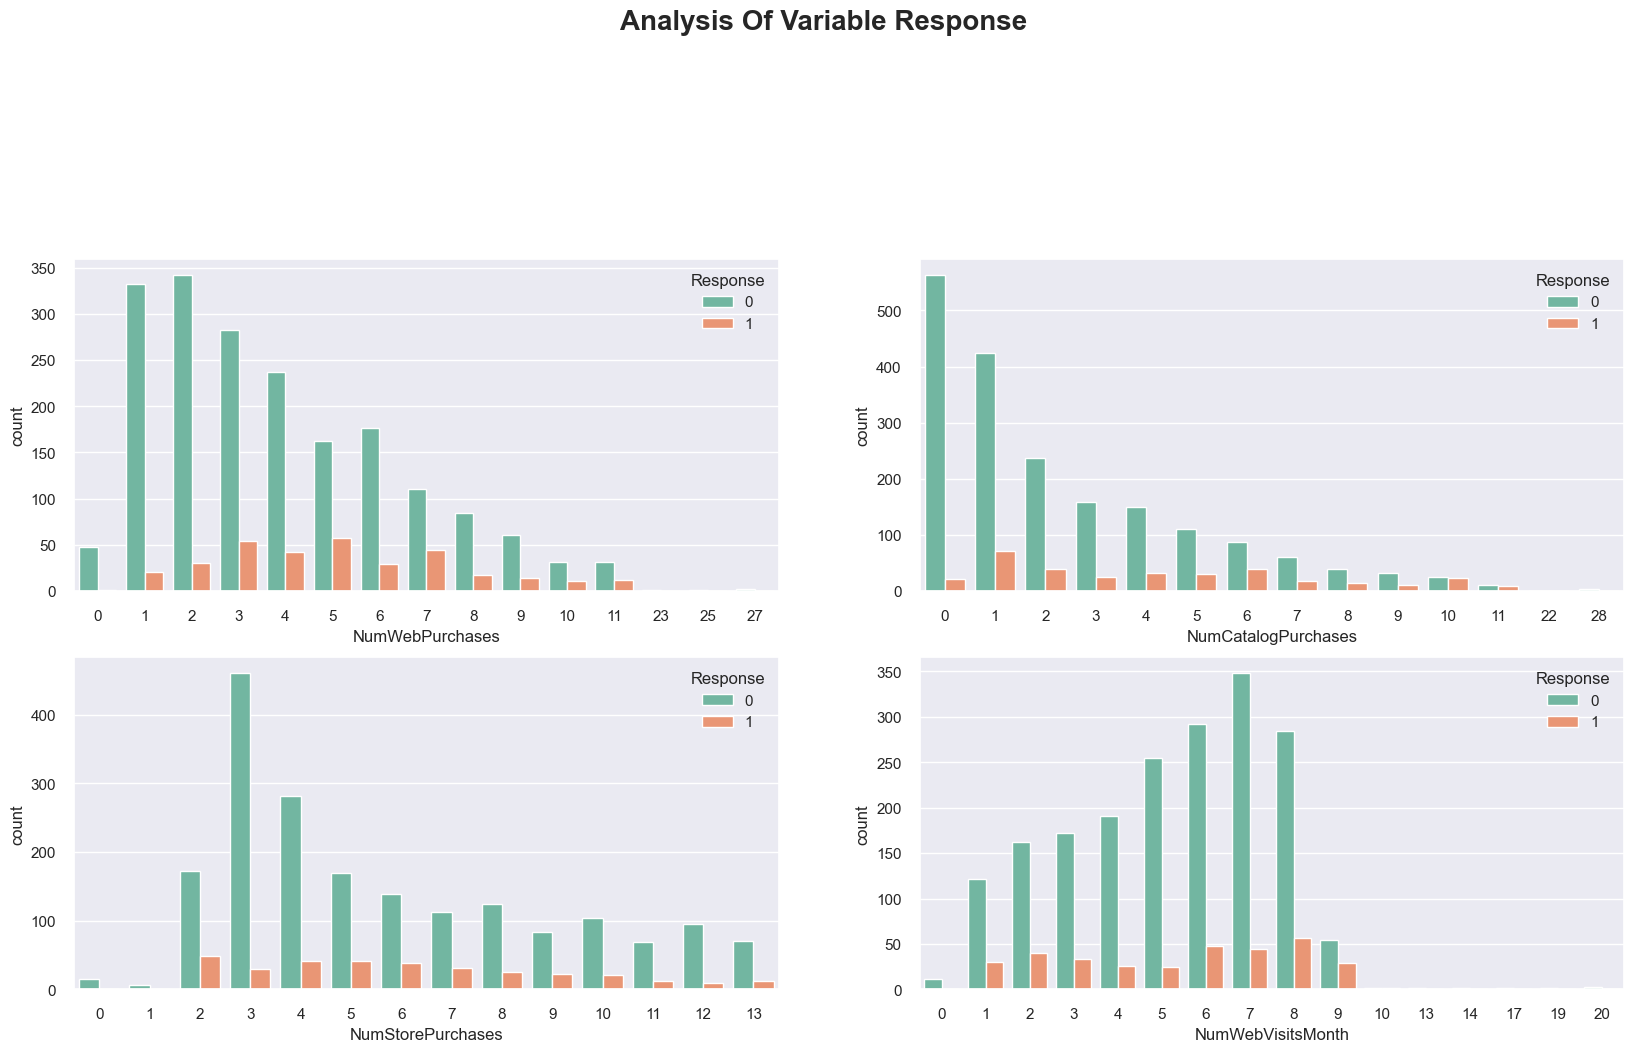

In [28]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'NumWebPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'NumCatalogPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'NumStorePurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'NumWebVisitsMonth', hue = 'Response', palette = 'Set2', data = df)

Promotion

<AxesSubplot: xlabel='AcceptedCmp5', ylabel='count'>

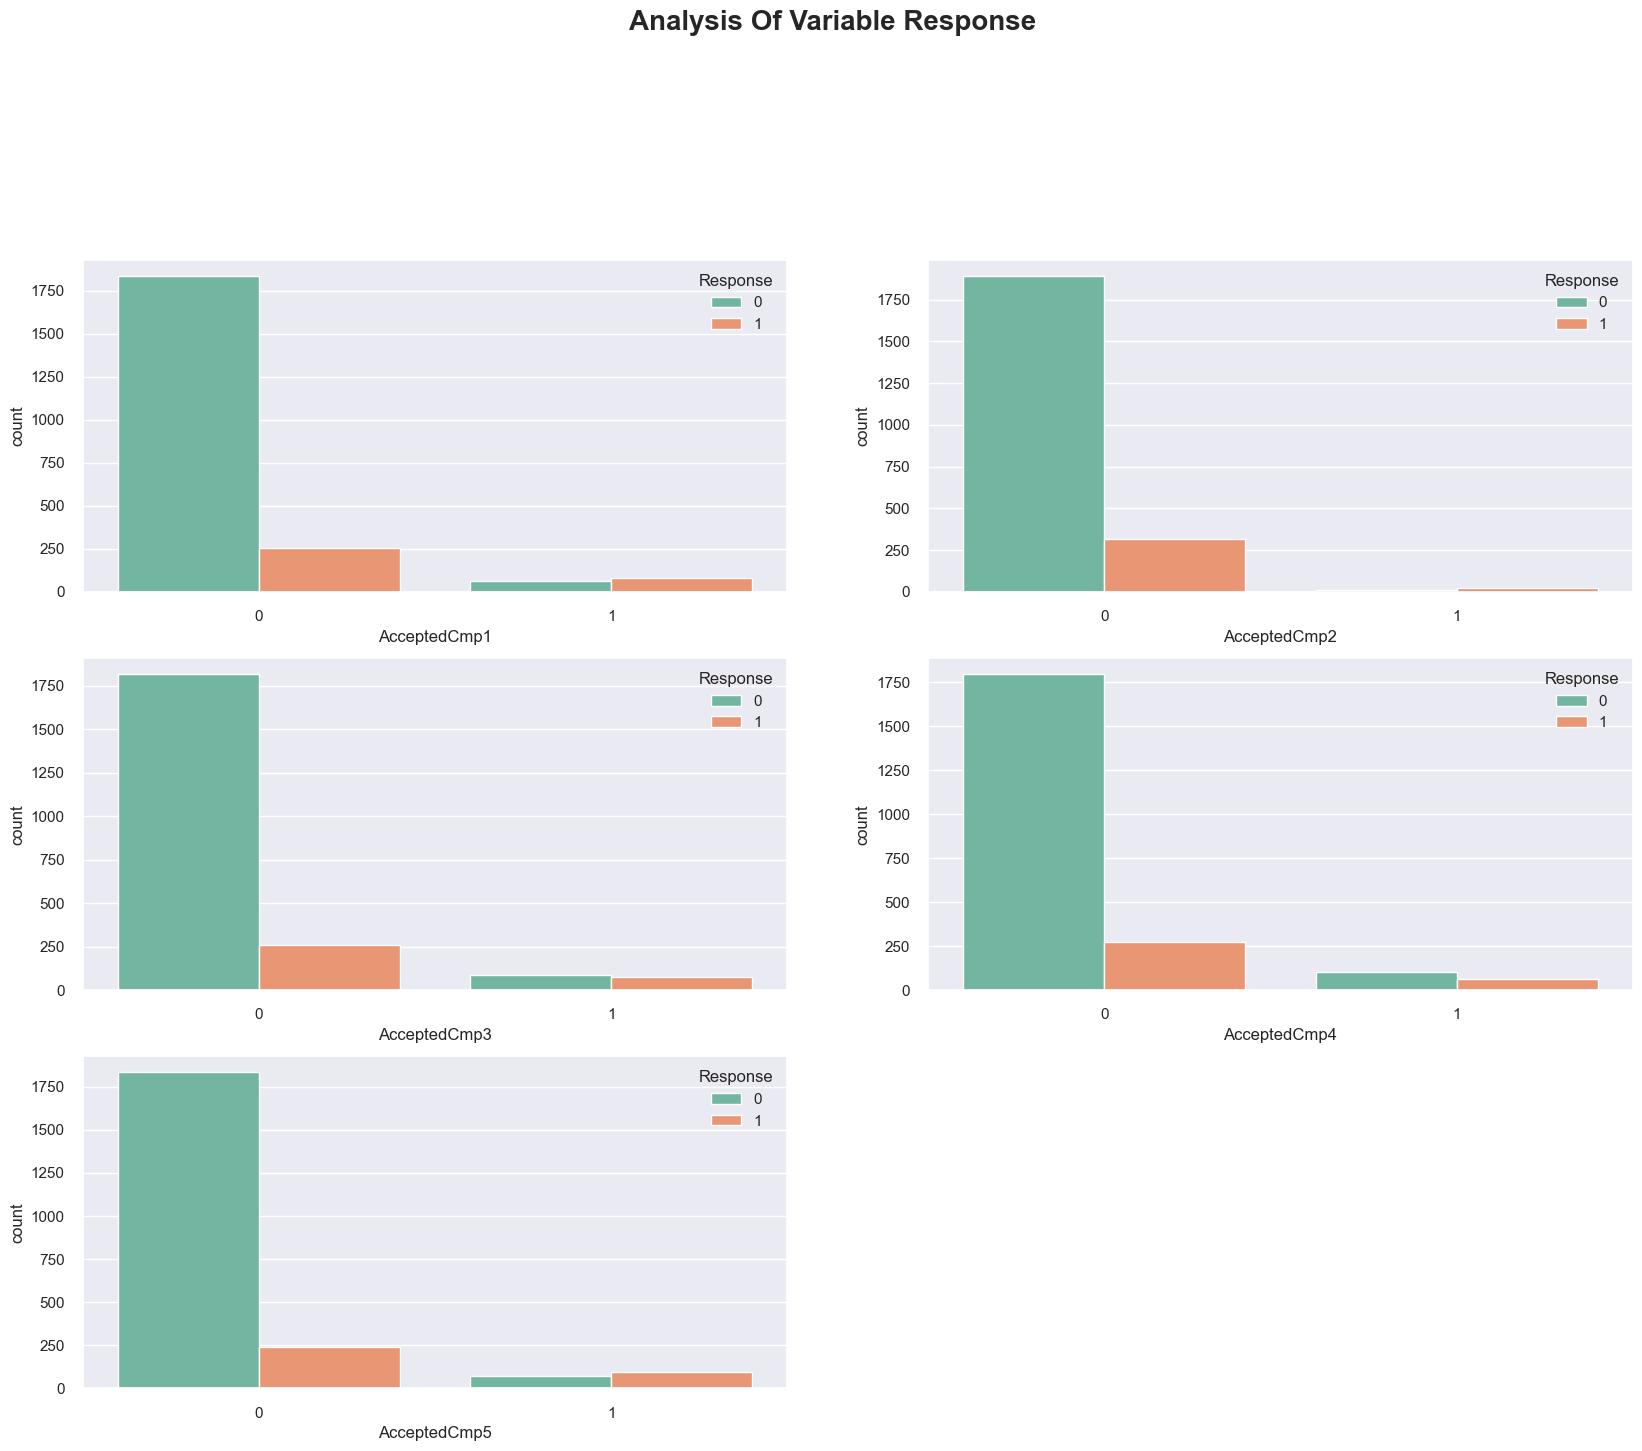

In [29]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'AcceptedCmp1', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'AcceptedCmp2', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'AcceptedCmp3', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'AcceptedCmp4', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'AcceptedCmp5', hue = 'Response', palette = 'Set2', data = df)

## <span style="color:#45F0F3"> Segmentation </span>

In [30]:
df.Education.value_counts()

Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [31]:
df['Education'] = df['Education']
df['Education'].replace('Graduation', 1, inplace=True)
df['Education'].replace('PhD', 1, inplace=True)
df['Education'].replace('Master', 1, inplace=True)
df['Education'].replace('2n Cycle',0, inplace=True)
df['Education'].replace('Basic', 0, inplace=True)

In [32]:
df.Marital_Status.value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [33]:
df['Relationship_Status'] = df['Marital_Status']
df['Relationship_Status'].replace('Married', 1, inplace=True)
df['Relationship_Status'].replace('Together', 2, inplace=True)
df['Relationship_Status'].replace('Single', 0, inplace=True)
df['Relationship_Status'].replace('Divorced', 3, inplace=True)
df['Relationship_Status'].replace('Widow', 3, inplace=True)
df['Relationship_Status'].replace('Alone', 0, inplace=True)
df['Relationship_Status'].replace('Absurd', 0, inplace=True)
df['Relationship_Status'].replace('YOLO', 0, inplace=True)

In [34]:
current_year = 2023
df['Age'] = current_year - df.Year_Birth

In [35]:
df_segmentation = df[['Age', 'Education', 'Relationship_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency']]
df_segmentation.head()

,Age,Education,Relationship_Status,Income,Kidhome,Teenhome,Recency
ID,,,,,,,
5524,66,1,0,58138.0,0,0,58
2174,69,1,0,46344.0,1,1,38
4141,58,1,2,71613.0,0,0,26
6182,39,1,2,26646.0,1,0,26
5324,42,1,1,58293.0,1,0,94


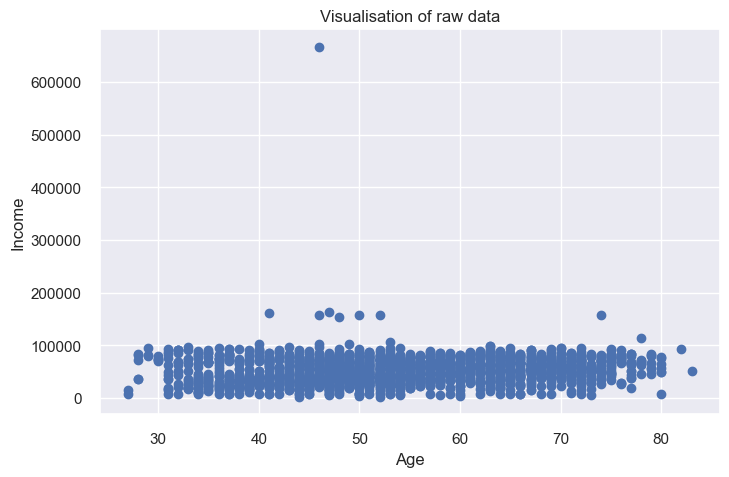

In [36]:
plt.figure(figsize = (8, 5))
plt.scatter(df_segmentation.iloc[:, 0], df_segmentation.iloc[:, 3])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualisation of raw data')

plt.show()

In [37]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)


In [38]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [39]:
pca = PCA(n_components = 5)
pca.fit(segmentation_std)

PCA(n_components=5)

In [40]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'])
df_pca_comp

,Age,Education,Relationship_Status,Income,Kidhome,Teenhome,Recency
Campaign 1,0.537933,0.280292,0.242406,0.459245,-0.476472,0.367440,0.018964
Campaign 2,-0.314364,-0.059264,-0.303593,0.517625,-0.472772,-0.548317,-0.115729
Campaign 3,0.052831,-0.419823,0.373094,-0.041745,-0.068929,0.001974,-0.821742
Campaign 4,0.006259,-0.627325,0.491334,0.025275,-0.179013,-0.147255,0.557357
Campaign 5,0.206161,-0.553594,-0.668201,-0.071023,-0.188793,0.404573,0.013116


In [41]:
scores_pca = pca.transform(segmentation_std)

In [42]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10) 

In [43]:
kmeans_pca.fit(scores_pca)

C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [44]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)

df_segm_pca_kmeans.columns.values[-5: ] = ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [45]:
df_segm_pca_kmeans.head()

,Age,Education,Relationship_Status,Income,Kidhome,Teenhome,Recency,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Segment K-means PCA
0,66,1,0,58138.0,0,0,58,0.488510,1.068811,-0.815244,-0.428598,0.691153,1
1,69,1,0,46344.0,1,1,38,0.190386,-1.056905,-0.339065,-1.426735,1.160226,0
2,58,1,2,71613.0,0,0,26,0.846496,1.054820,0.810140,-0.014610,-0.890407,1
3,39,1,2,26646.0,1,0,26,-1.723357,-0.227123,0.670038,-0.401942,-1.450460,3
4,42,1,1,58293.0,1,0,94,-1.221840,0.379315,-1.686146,0.429775,-0.760827,3


In [46]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Age,Education,Relationship_Status,Income,Kidhome,Teenhome,Recency,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5
Segment K-means PCA,,,,,,,,,,,,
0,61.146259,1.0,1.558957,52111.598639,0.319728,1.009070,49.156463,0.941461,-0.676665,-0.009221,-0.190838,0.173797
1,53.914230,1.0,1.187135,76413.389864,0.011696,0.083821,49.428850,0.602066,1.330266,-0.197507,-0.002479,-0.342670
2,49.231373,0.0,1.294118,41368.054902,0.509804,0.341176,48.325490,-1.368370,0.204078,1.169780,1.732309,1.356306
3,45.783646,1.0,1.076661,34187.737649,0.981261,0.192504,49.081772,-1.346327,-0.234493,-0.321703,-0.463626,-0.550863
